In [3]:
import pandas as pd
path_predictions_DLC = "C:\\Users\\user\\Desktop\\42312_2F_B2\\VideoProcessed2021-04-29T16_15_55DLC_resnet50_Dystonia_TestApr21shuffle1_500000.csv"
df_DLC = pd.read_csv(path_predictions_DLC)
df_DLC = df_DLC.drop(columns='scorer')
df_DLC.iloc[0] + ' ' + '(' + df_DLC.iloc[1] + ')'
df_DLC.iloc[0] = df_DLC.iloc[0] + ' ' + '(' + df_DLC.iloc[1] + ')'
df_DLC.drop(index=1)
df_DLC.columns = df_DLC.iloc[0]
df_DLC = df_DLC.drop(index=0)
df_DLC = df_DLC.drop(index=1)
df_DLC.reset_index(inplace = True, drop = True)
for column in df_DLC.columns:
    df_DLC[column] = pd.to_numeric(df_DLC[column])

df_DLC #dataframe with the DLC predictions

C:\Users\user\AppData\Local\Temp\ipykernel_20160\3482245668.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_DLC = pd.read_csv(path_predictions_DLC)


,nose (x),nose (y),nose (likelihood),tailbase (x),tailbase (y),tailbase (likelihood),tailtip (x),tailtip (y),tailtip (likelihood),left_frontlimb_digitaltip (x),...,left_frontlimb_heel (likelihood),right_frontlimb_heel (x),right_frontlimb_heel (y),right_frontlimb_heel (likelihood),left_hindlimb_heel (x),left_hindlimb_heel (y),left_hindlimb_heel (likelihood),right_hindlimb_heel (x),right_hindlimb_heel (y),right_hindlimb_heel (likelihood)
0,703.989075,109.582817,0.999959,565.206299,64.867920,0.999996,445.494476,85.937485,0.999992,672.765625,...,0.998369,646.727905,64.381477,0.967808,569.689392,82.955177,0.999935,595.056152,47.734856,0.998693
1,705.924377,116.035568,0.999999,569.691772,65.645523,0.999984,449.193756,79.449432,0.999983,670.523438,...,0.998542,666.607910,80.834373,0.968636,572.499634,81.936455,0.999638,596.521179,48.103065,0.999149
2,711.785583,118.557358,0.999998,575.658203,64.463608,0.999923,453.932098,72.325569,0.999981,670.901306,...,0.998694,684.069153,93.431816,0.998110,575.792603,79.244659,0.999684,599.098511,49.064873,0.999250
3,714.602661,120.410118,0.999976,580.195007,63.737652,0.999988,459.874084,67.750328,0.999994,670.257080,...,0.998580,690.320740,95.466553,0.999417,579.551697,81.048454,0.999733,601.921143,48.129837,0.999159
4,721.245789,121.846405,0.999992,587.219116,64.561485,0.999910,467.661896,67.922020,0.999998,671.724060,...,0.998568,695.163635,94.794434,0.997733,583.064758,78.803604,0.998690,605.472717,48.319180,0.998719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37108,679.074097,169.885544,0.746022,696.506592,111.462242,0.999984,619.093933,50.051315,0.999972,626.738892,...,0.999868,664.814636,161.185226,0.970159,672.147644,123.665230,0.996423,694.438171,144.265381,0.998994
37109,679.212158,169.614487,0.627104,696.559998,111.513847,0.999984,618.883423,52.940262,0.999976,627.074768,...,0.999840,663.518005,161.472198,0.945097,672.501709,123.696381,0.996318,694.466858,144.530197,0.999128
37110,603.555359,136.817764,0.970762,697.931335,112.178101,0.999958,621.939941,51.141613,0.999969,626.684265,...,0.999529,645.553528,157.127716,0.988420,670.552734,123.600143,0.997666,694.630188,145.465958,0.999550
37111,605.983887,136.335541,0.767845,698.152649,114.096436,0.999980,628.783142,49.886978,0.999981,626.778809,...,0.999742,643.263794,159.036041,0.999342,670.412964,125.062004,0.999212,694.155090,146.660553,0.999359


In [4]:
#don't run this cell more than once (if you did, re-run the previous cell before running the present one)
import numpy as np
df_vel = df_DLC.copy(deep=False)

for column in df_vel.columns:
    if ('likelihood' and 'Timestamp') not in column :
        df_vel[column] = np.abs(df_vel[column].diff())

my_list=[]
for col in df_vel.columns:
    if 'likelihood' not in col:
        my_list.append('Vel - ' + col)

for col in df_vel.columns:
    for new_name in my_list:
        if col in new_name:
            df_vel.rename({col:new_name}, axis=1, inplace=True)
            
for col in df_vel.columns:
    if '(likelihood)' in col:
        loc = df_vel.columns.get_loc(col)
        V_xy = np.sqrt(df_vel[df_vel.columns[loc-2]]**2+df_vel[df_vel.columns[loc-1]]**2)
        name_column = 'V_xy_'+df_vel.columns[loc].split(" ")[0]
        df_vel.insert(loc, name_column, V_xy)

# I dropped the first row (NaN values) since, every row represents a diff between the coordinates of consecutive frames
df_vel = df_vel.drop(index=0)
df_vel.reset_index(inplace = True, drop = True)
    
df_vel #dataframe with the velocities (x, y and absolute - px/frame) obtained from the DLC predictions

,Vel - nose (x),Vel - nose (y),V_xy_nose,nose (likelihood),Vel - tailbase (x),Vel - tailbase (y),V_xy_tailbase,tailbase (likelihood),Vel - tailtip (x),Vel - tailtip (y),...,V_xy_right_frontlimb_heel,right_frontlimb_heel (likelihood),Vel - left_hindlimb_heel (x),Vel - left_hindlimb_heel (y),V_xy_left_hindlimb_heel,left_hindlimb_heel (likelihood),Vel - right_hindlimb_heel (x),Vel - right_hindlimb_heel (y),V_xy_right_hindlimb_heel,right_hindlimb_heel (likelihood)
0,1.935303,6.452751,6.736720,4.005432e-05,4.485474,0.777603,4.552377,1.239777e-05,3.699280,6.488052,...,25.805278,0.000828,2.810242,1.018723,2.989190,0.000296,1.465027,0.368210,1.510590,0.000456
1,5.861206,2.521790,6.380686,1.192093e-07,5.966431,1.181915,6.082369,6.127357e-05,4.738342,7.123863,...,21.531153,0.029474,3.292969,2.691795,4.253164,0.000046,2.577332,0.961807,2.750947,0.000100
2,2.817078,1.852760,3.371742,2.205372e-05,4.536804,0.725956,4.594519,6.592274e-05,5.941986,4.575241,...,6.574382,0.001307,3.759094,1.803795,4.169468,0.000049,2.822632,0.935036,2.973473,0.000091
3,6.643127,1.436287,6.796621,1.525879e-05,7.024109,0.823833,7.072256,7.855892e-05,7.787811,0.171692,...,4.889313,0.001684,3.513062,2.244850,4.169047,0.001043,3.551575,0.189342,3.556618,0.000440
4,4.830872,1.468178,5.049046,3.695488e-06,5.566833,0.099838,5.567729,6.186962e-05,5.539978,1.436821,...,1.578733,0.000104,14.130554,6.424660,15.522526,0.001295,0.949280,0.241886,0.979613,0.000475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37107,76.738953,10.639099,77.472945,1.434436e-01,1.092590,0.824089,1.368531,1.668930e-05,4.606018,3.213882,...,0.492116,0.008292,0.160950,0.131798,0.208028,0.000575,0.258301,0.014069,0.258684,0.000207
37108,0.138062,0.271057,0.304192,1.189179e-01,0.053406,0.051605,0.074265,3.576279e-07,0.210510,2.888947,...,1.328008,0.025063,0.354065,0.031151,0.355433,0.000105,0.028687,0.264816,0.266366,0.000135
37109,75.656799,32.796722,82.459543,3.436582e-01,1.371338,0.664253,1.523745,2.586842e-05,3.056519,1.798649,...,18.482342,0.043323,1.948975,0.096237,1.951349,0.001347,0.163330,0.935760,0.949908,0.000422
37110,2.428528,0.482224,2.475942,2.029172e-01,0.221313,1.918335,1.931059,2.181530e-05,6.843201,1.254635,...,2.980702,0.010922,0.139771,1.461861,1.468527,0.001547,0.475098,1.194595,1.285603,0.000191


In [6]:
# build a function that calculates moving averages
# the result will have a len = len(original data) - (window - 1)
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [8]:
# build a new dataframe containing the V_xy filtered with a window of 10 
# frames for detection of movement bouts
df_vel_filtered = pd.DataFrame()

window_vel_filtered = 10
for column in df_vel.columns:
    if 'V_xy' in column:
        velocity_filtered = moving_average(df_vel[column], window_vel_filtered)
        df_vel_filtered[column] = velocity_filtered
    elif 'likelihood' in column:
        df_vel_filtered[column] = df_vel[column]
    
df_vel_filtered

,V_xy_nose,nose (likelihood),V_xy_tailbase,tailbase (likelihood),V_xy_tailtip,tailtip (likelihood),V_xy_left_frontlimb_digitaltip,left_frontlimb_digitaltip (likelihood),V_xy_right_frontlimb_digitaltip,right_frontlimb_digitaltip (likelihood),...,V_xy_right_hindlimb_digitaltip,right_hindlimb_digitaltip (likelihood),V_xy_left_frontlimb_heel,left_frontlimb_heel (likelihood),V_xy_right_frontlimb_heel,right_frontlimb_heel (likelihood),V_xy_left_hindlimb_heel,left_hindlimb_heel (likelihood),V_xy_right_hindlimb_heel,right_hindlimb_heel (likelihood)
0,4.413966,4.005432e-05,3.320326,0.000012,6.300760,9.417534e-06,0.919483,0.000689,7.925925,0.002191,...,1.855996,0.036805,0.589712,0.000174,6.361503,0.000828,4.380466,0.000296,1.838273,0.000456
1,3.988944,1.192093e-07,2.903203,0.000061,5.694847,2.145767e-06,0.683441,0.000327,1.819142,0.072291,...,1.616564,0.011851,0.577965,0.000152,3.803456,0.029474,4.123486,0.000046,1.781441,0.000100
2,3.653776,2.205372e-05,2.391551,0.000066,4.974337,1.311302e-05,0.703648,0.000167,1.491874,0.003676,...,10.672336,0.011202,0.521791,0.000114,1.688041,0.001307,3.744737,0.000049,1.585889,0.000091
3,4.237615,1.525879e-05,2.026258,0.000079,4.546225,4.649162e-06,0.650091,0.000444,1.242285,0.000878,...,10.558487,0.007348,0.458366,0.000012,1.108096,0.001684,3.355197,0.001043,1.432807,0.000440
4,4.598058,3.695488e-06,1.352601,0.000062,3.820142,5.364418e-06,0.524596,0.000637,1.175767,0.000299,...,10.704659,0.015242,0.389780,0.000380,0.990816,0.000104,2.939984,0.001295,1.155004,0.000475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37098,15.068754,8.195311e-03,2.167184,0.000026,5.000022,4.768372e-07,4.684835,0.017747,0.848451,0.020051,...,3.676970,0.000058,3.034304,0.002175,1.435488,0.017703,0.836128,0.000005,2.689765,0.000003
37099,15.052208,6.233664e-02,2.097984,0.000017,5.177961,2.384186e-07,4.126751,0.024494,0.962670,0.044257,...,3.670967,0.000248,3.000153,0.011821,1.446216,0.009658,0.803683,0.000015,2.616393,0.000008
37100,19.931861,4.119746e-02,2.103716,0.000008,5.426816,5.698204e-05,4.551869,0.064175,3.604819,0.039900,...,3.911718,0.000122,3.125495,0.017307,3.239924,0.073362,0.979192,0.000028,2.593598,0.000026
37101,18.725481,5.753429e-01,2.095538,0.000004,5.377990,7.987022e-06,2.456532,0.114339,3.824505,0.004942,...,3.988798,0.000354,1.902711,0.037116,3.321890,0.013716,1.095463,0.000169,2.589863,0.000187


##### Crossing point between two gaussians fitted to the kernel density estimation...

ValueError: Inconsistent shapes between bounds and `x0`.

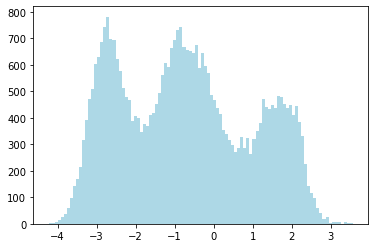

In [24]:
# obtain the treshold - working on it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from shapely.geometry import LineString

y,x,_=plt.hist(np.log(velocity_filtered), bins=100, color='lightblue')

x=(x[1:]+x[:-1])/2 

def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2) 

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x, mu1, sigma1, A1)+gauss(x, mu2, sigma2, A2)

def multimodal_3(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3):
    return gauss(x, mu1, sigma1, A1)+gauss(x, mu2, sigma2, A2)+gauss(x, mu3, sigma3, A3)
    
expected_multimodal = (-3, .1, max(y)/2, -1, .1, max(y)/2, 2, .1, max(y)/2)
params, cov = curve_fit(multimodal_3, x, y, expected, 
        bounds=((-np.inf, 0, 0, -np.inf, 0, 0, -np.inf, 0, 0), (np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf)))

sigma=np.sqrt(np.diag(cov))
x_fit=np.linespace(x.min(), x.max(), 500)
f = gauss(x_fit, *params[:3])
g = gauss(x_fit, *params[3:6])
h = gauss(x_fit, *params[6:])
plt.plot(x_fit, multimodal(x_fit, *params), color='red', lw=3, label='model')
plt.plot(x_fit, gauss(x_fit, *params[:3]), color='red', ls='--')
plt.plot(x_fit, gauss(x_fit, *params[3:6]), color='red', ls=':')
plt.plot(x_fit, gauss(x_fit, *params[6:]), color='red', ls='-.')

first_line = LineString(np.column_stack((x_fit, f)))
second_line = LineString(np.column_stack((x_fit, g)))
third_line = LineString(np.column_stack((x_fit, h)))
intersection = second_line.intersection(third_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o', color='orange')
#not the real cutoff since I used the log of the data (as such, it should be applied to the log accel series)
cutOff_heel_filtered_cg = LineString(intersection).xy[0][0]
cutOff_heel_filtered_cg 